Проанализировать ряды и сделайте их стационарными.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox

In [90]:
airlines_passengers = pd.read_csv('international-airline-passengers.csv', index_col = 'Month', parse_dates = True)
airlines_passengers.head()

,Count
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [79]:
airlines_passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


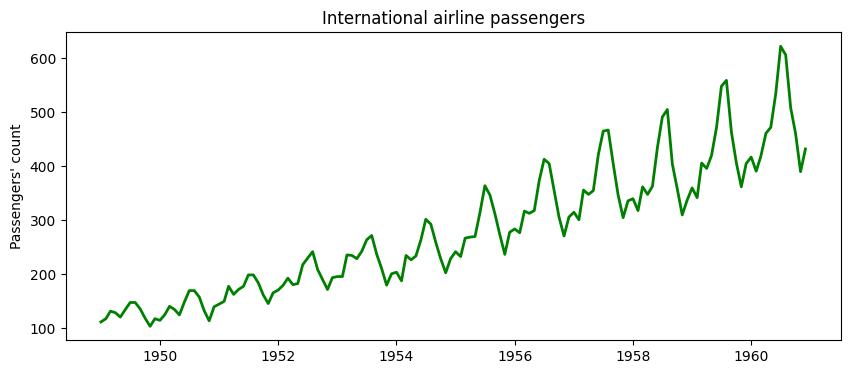

In [91]:
plt.figure(figsize=(10, 4))
plt.plot(airlines_passengers, 'g', linewidth=2.)
plt.ylabel("Passengers' count")
plt.title('International airline passengers')
plt.show()

# Виден тренд, значит, ряд не стационарен и есть сезонность. А вот есть ли цикл сказать сложно, но не уверена, что есть. 
# Выбросов нет

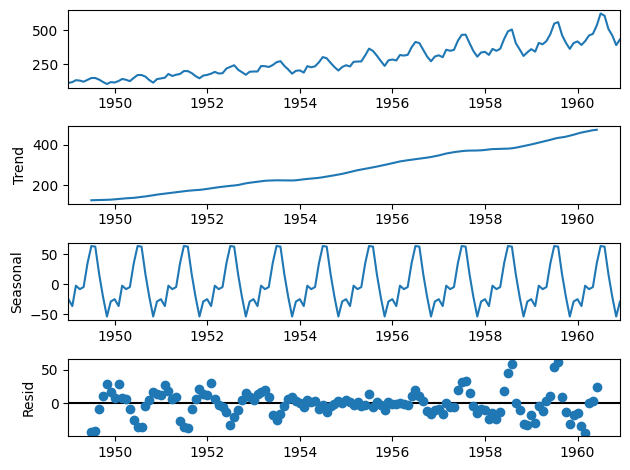

In [72]:
decompose = seasonal_decompose(airlines_passengers)
decompose.plot()
plt.show()

In [92]:
adf_test = adfuller(airlines_passengers)
adf_test

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [74]:
print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


In [93]:
series = boxcox(airlines_passengers, 0)

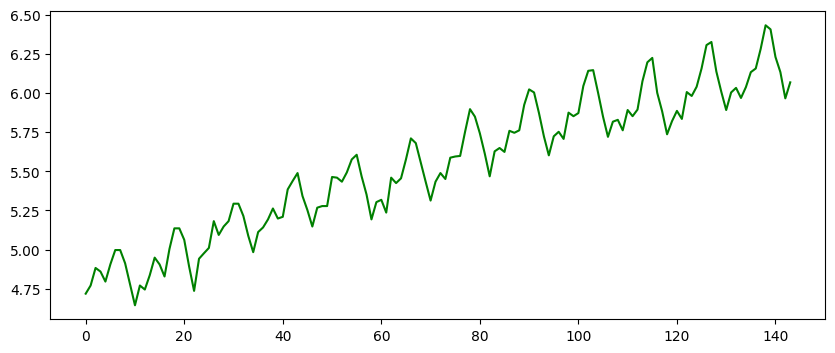

In [94]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'g')

In [95]:
series = series[1:] - series[:-1]

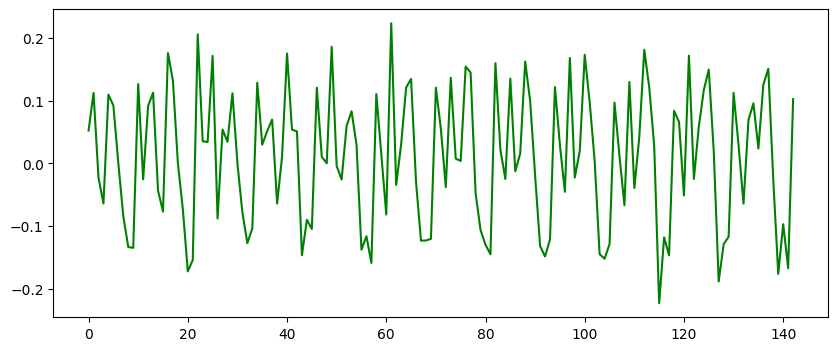

In [96]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'g')
plt.show()

In [97]:
adf_test_after = adfuller(series)
print('p-value = ' + str(adf_test_after[1]))    

p-value = 0.07112054815086184


In [98]:
series = series[1:] - series[:-1]

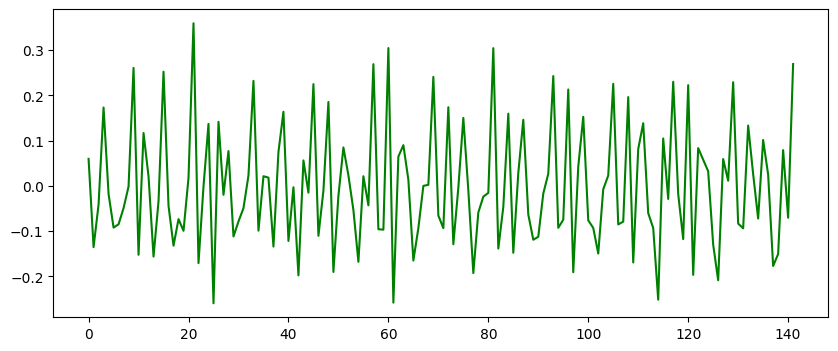

In [99]:
plt.figure(figsize=(10, 4))
plt.plot(series, 'g')
plt.show()

In [100]:
adf_test_after = adfuller(series)
print('p-value = ' + str(adf_test_after[1]))    

p-value = 7.419304549376186e-13
